In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pipelines import NaiveBayesPipeline
import miceforest as mf
from feature_selection import FeatureSelector
import feature_selection
from outlier_detection import OutlierDetector
import outlier_detection


df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [3]:
fs = FeatureSelector(X_train, y_train, task_type='classification')
fs.run_selection()

Running permutation feature selection...
Running symmetrical_uncertainty feature selection...
Running f_score feature selection...
Running jmim feature selection...
Running LASSO feature selection...
Running sequential feature selection...


C:\Users\ngyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(


Running random_forest feature selection...


In [4]:
results_table = fs.get_results_table()
print(results_table)

              permutation symmetrical_uncertainty f_score jmim LASSO  \
Location                ✗                       ✓       ✗    ✓     ✓   
MinTemp                 ✓                       ✓       ✓    ✓     ✓   
MaxTemp                 ✓                       ✓       ✓    ✓     ✗   
Rainfall                ✓                       ✓       ✓    ✓     ✓   
WindGustDir             ✓                       ✗       ✗    ✓     ✓   
WindGustSpeed           ✓                       ✓       ✓    ✓     ✓   
WindDir9am              ✗                       ✗       ✗    ✓     ✓   
WindDir3pm              ✗                       ✓       ✓    ✓     ✓   
WindSpeed9am            ✗                       ✗       ✓    ✗     ✓   
WindSpeed3pm            ✗                       ✗       ✓    ✓     ✓   
Pressure9am             ✗                       ✓       ✓    ✓     ✓   
Pressure3pm             ✓                       ✓       ✓    ✓     ✓   
Temp9am                 ✗                       ✓       ✗    ✗  

In [5]:
count_table = fs.get_count()
print("Feature selection counts:")
print(count_table)

Feature selection counts:
               Count
MinTemp        7 / 7
Rainfall       7 / 7
Temp3pm        7 / 7
RainToday      7 / 7
WindGustSpeed  6 / 7
Pressure3pm    6 / 7
MaxTemp        5 / 7
WindDir3pm     5 / 7
Pressure9am    5 / 7
Location       4 / 7
WindGustDir    4 / 7
WindSpeed9am   4 / 7
WindSpeed3pm   4 / 7
WindDir9am     3 / 7
Temp9am        3 / 7


In [6]:
all_selected = fs.all_features_selected()
print("\nFeatures selected by all methods:", all_selected)


Features selected by all methods: ['MinTemp', 'Rainfall', 'Temp3pm', 'RainToday']


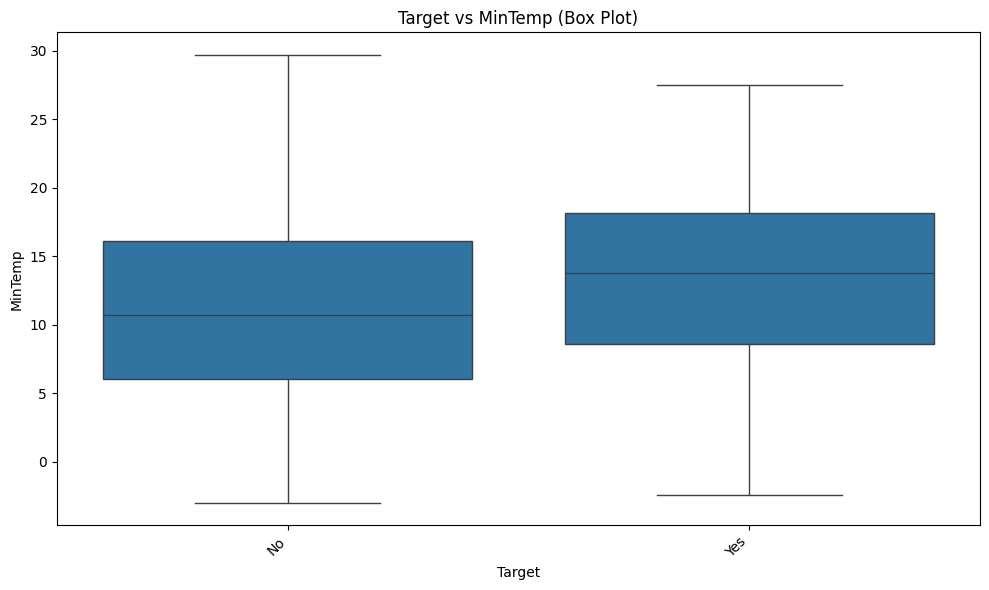

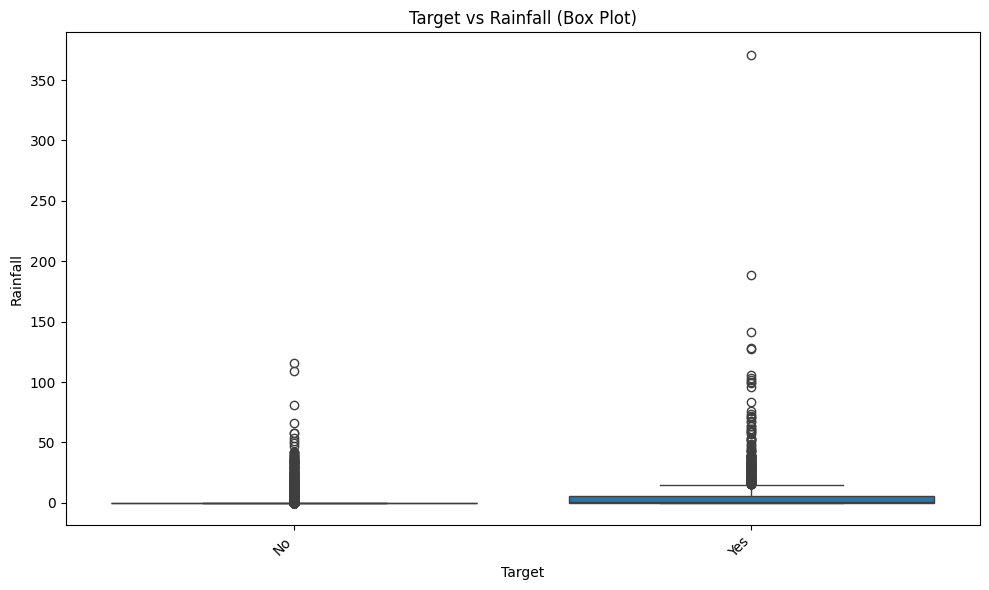

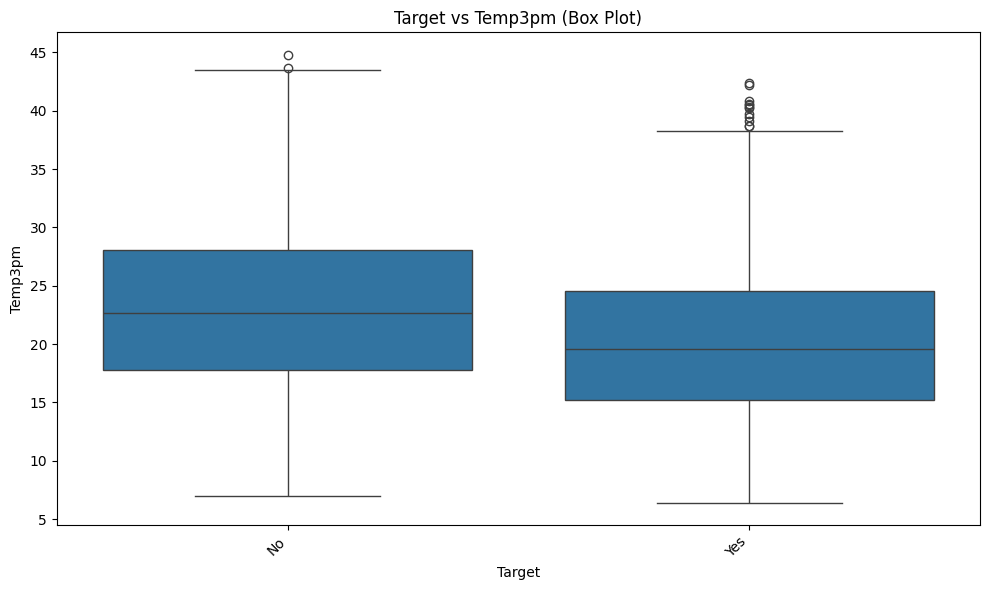

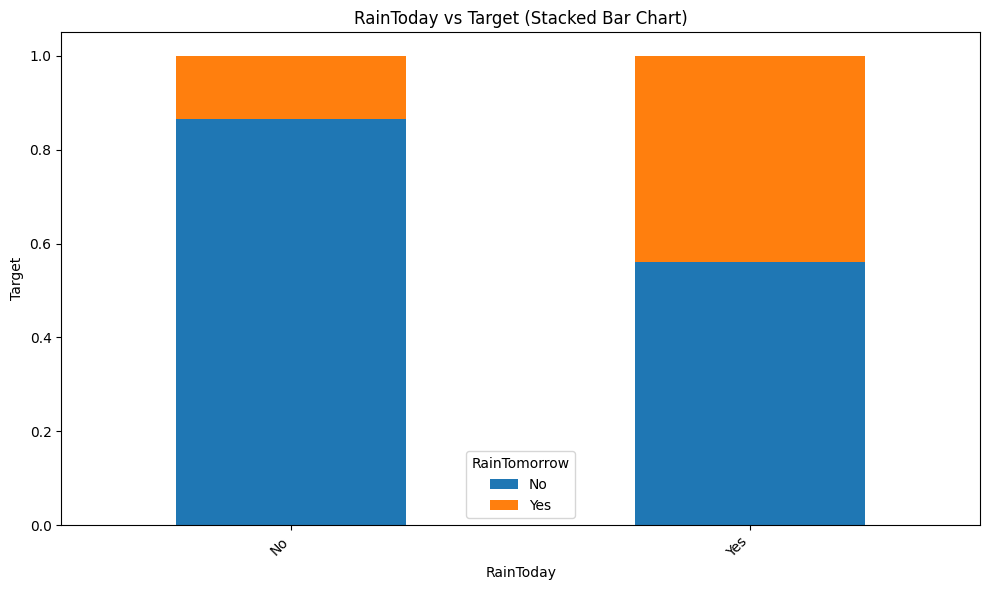

In [7]:
fs.feature_plot(all_selected)


Features selected by at least 2 methods: ['MinTemp', 'Rainfall', 'Temp3pm', 'RainToday', 'WindGustSpeed', 'Pressure3pm', 'MaxTemp', 'WindDir3pm', 'Pressure9am', 'Location', 'WindGustDir', 'WindSpeed9am', 'WindSpeed3pm', 'WindDir9am', 'Temp9am']


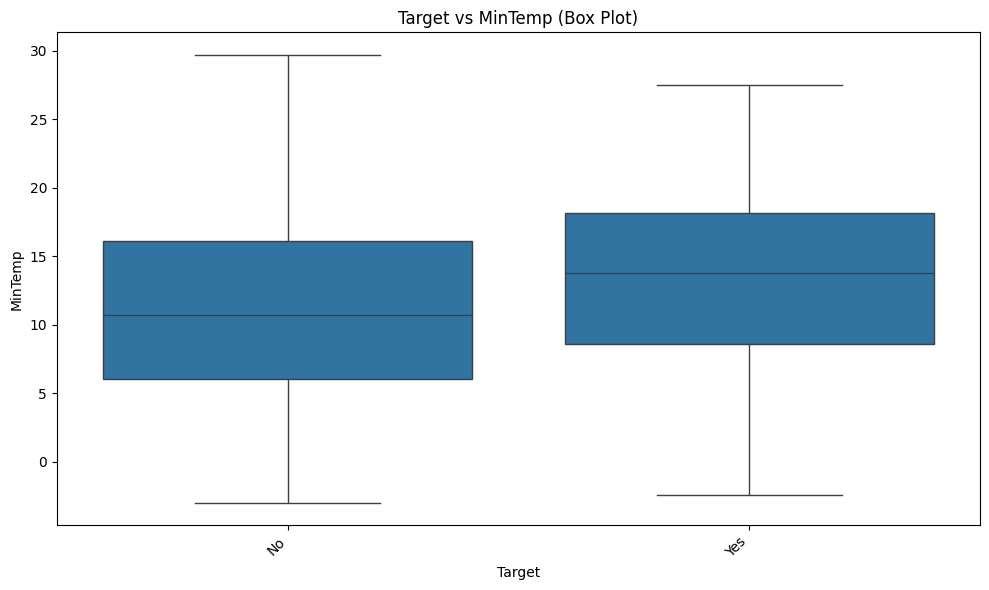

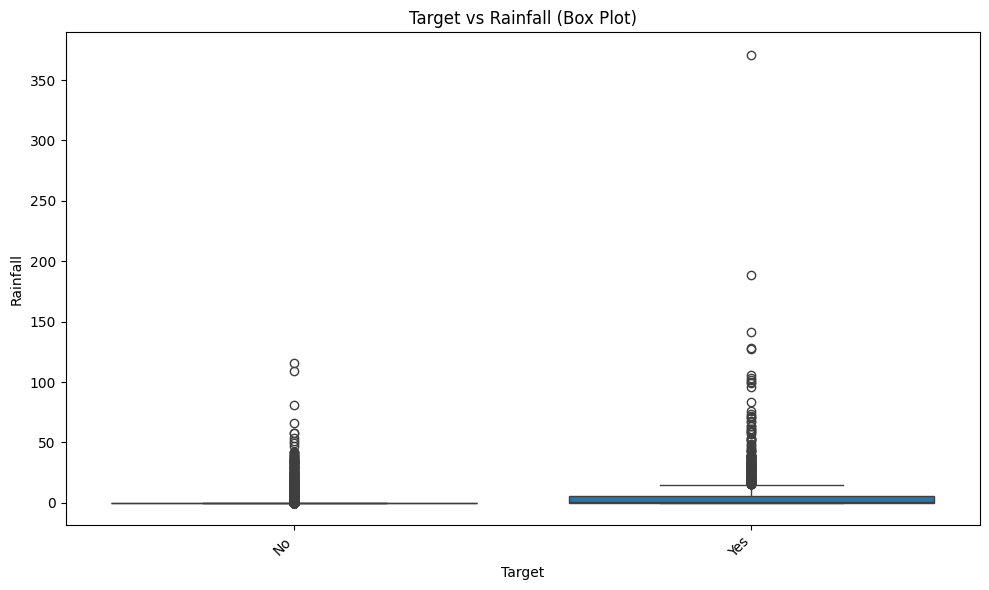

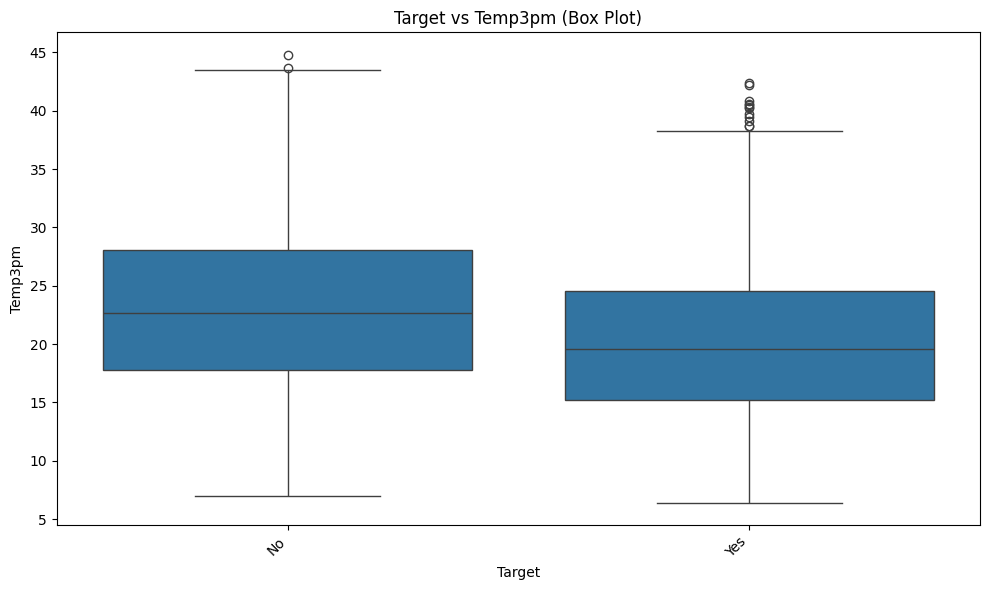

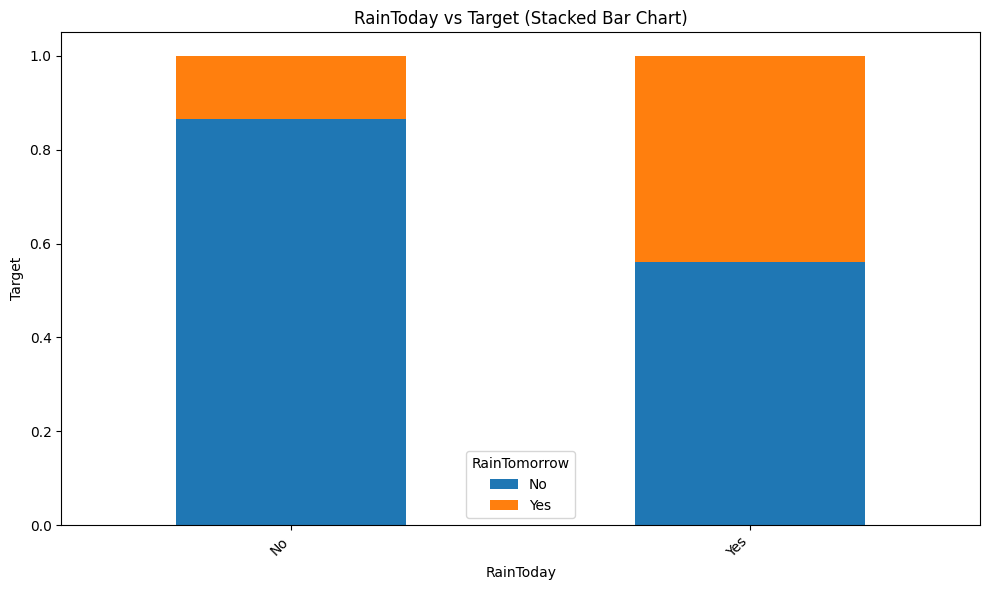

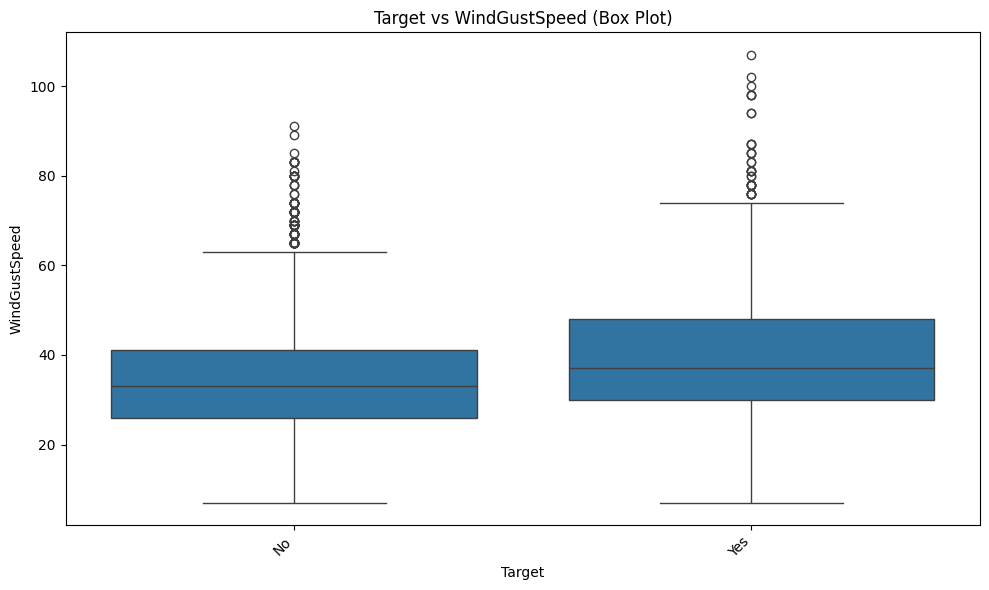

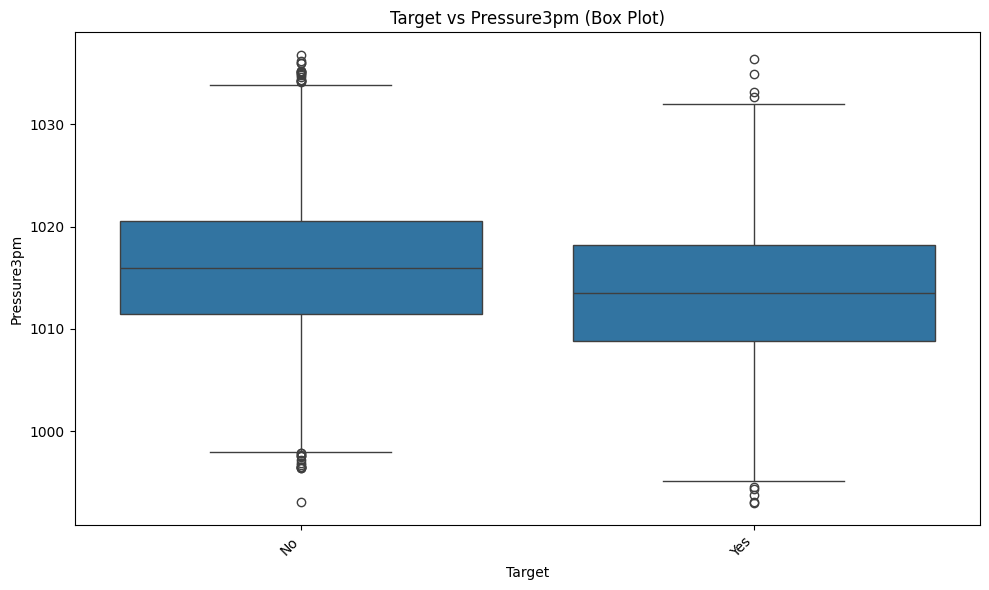

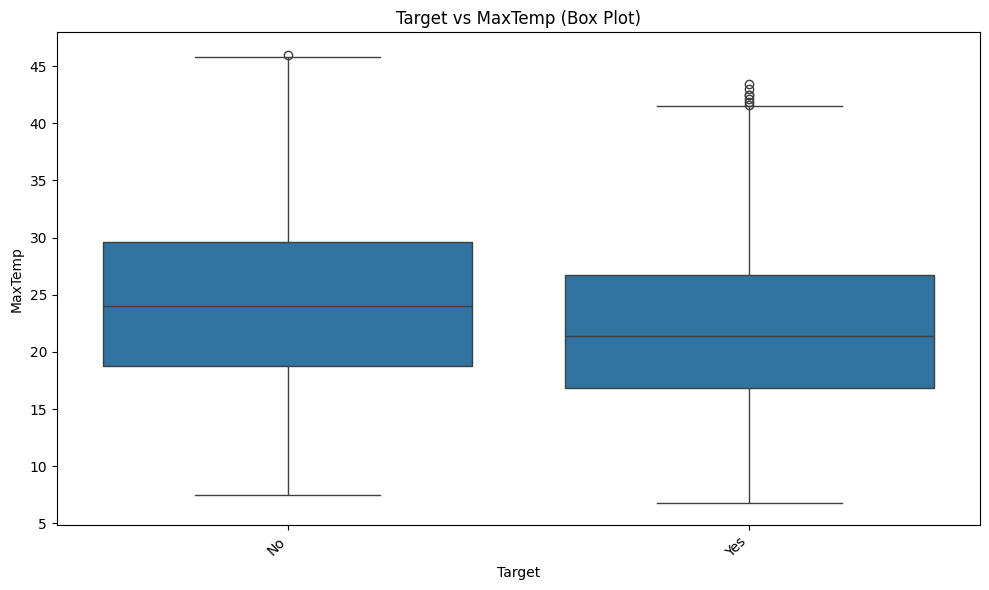

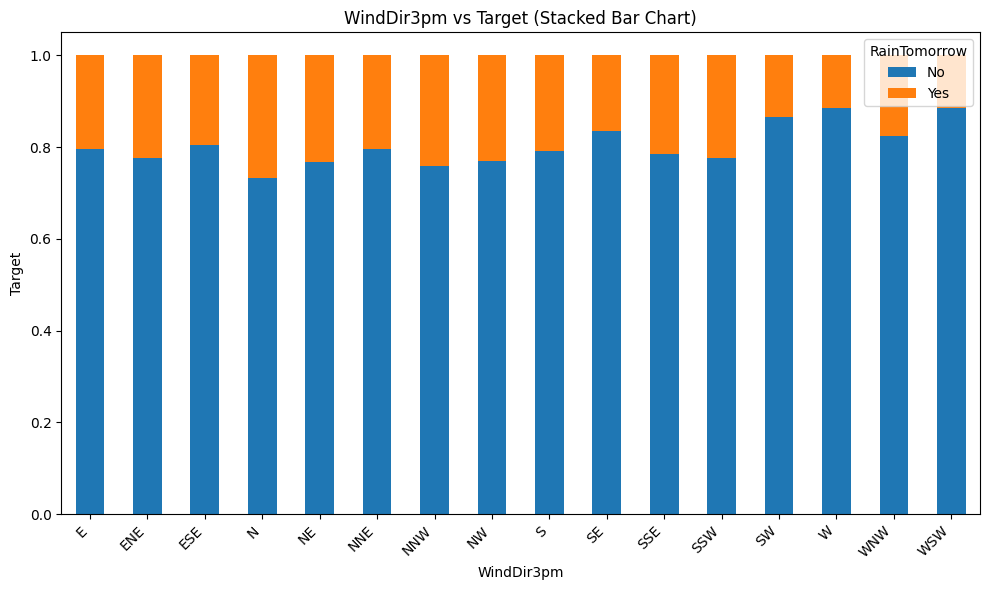

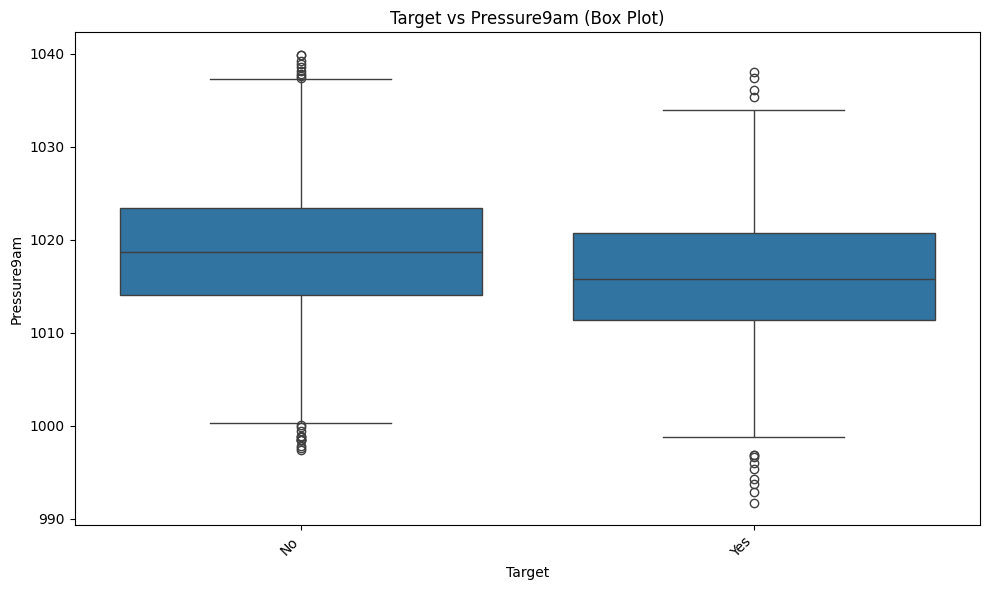

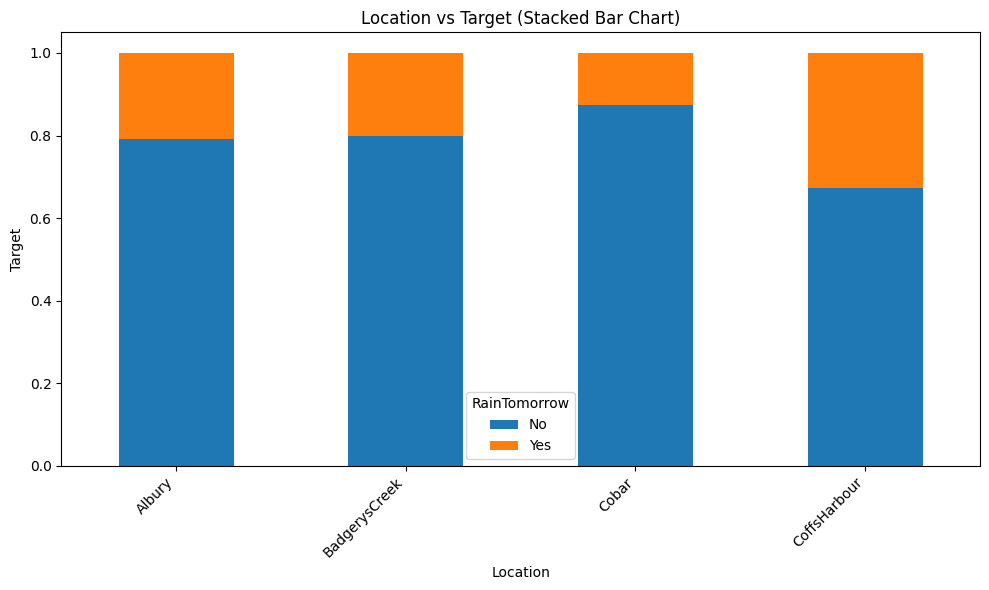

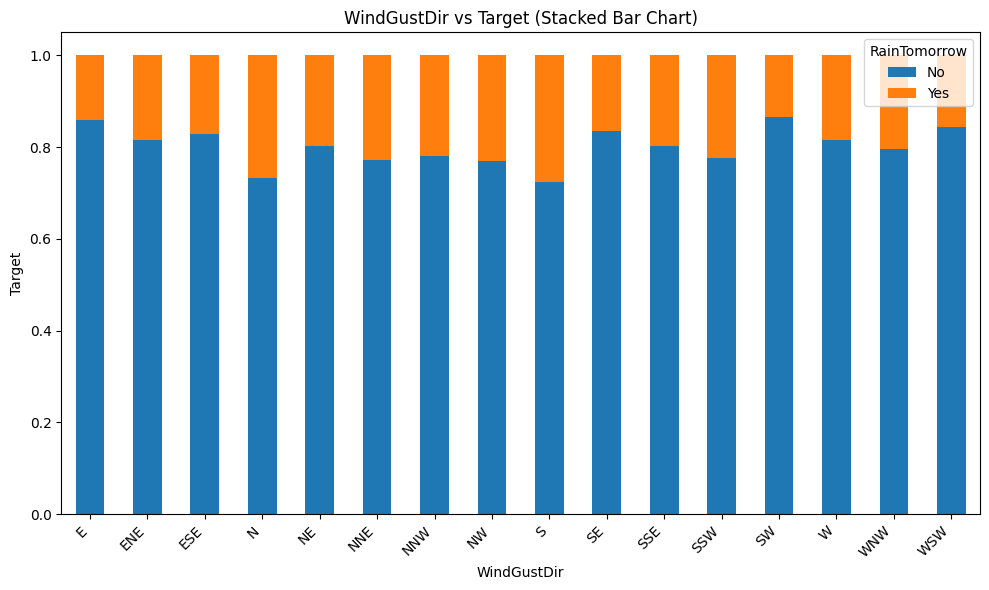

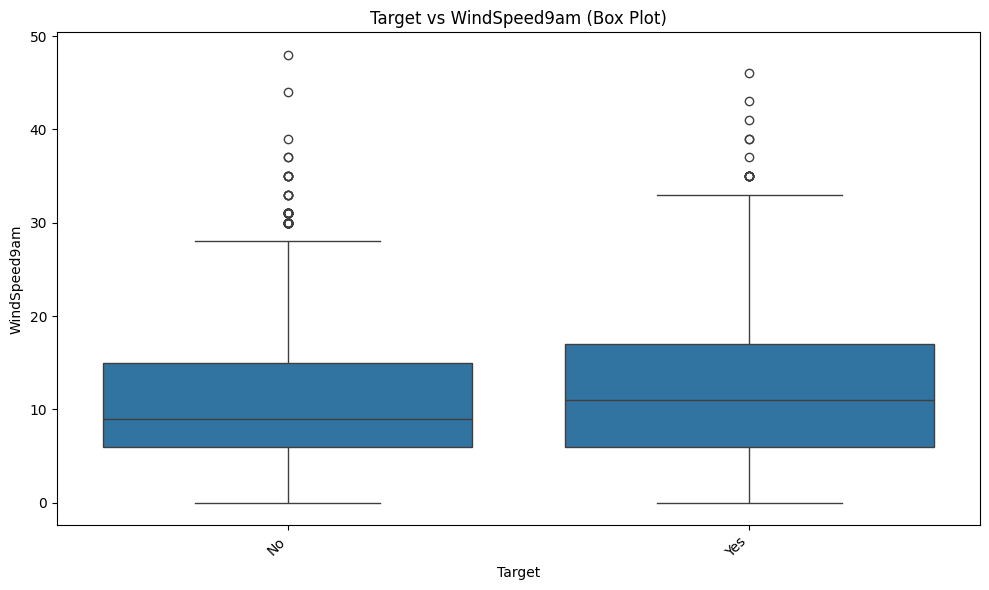

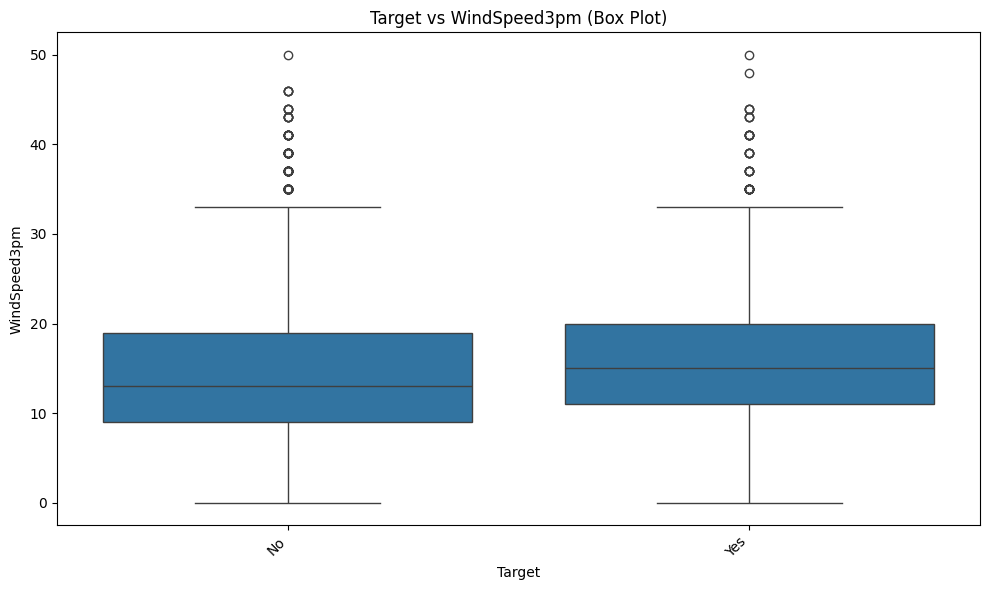

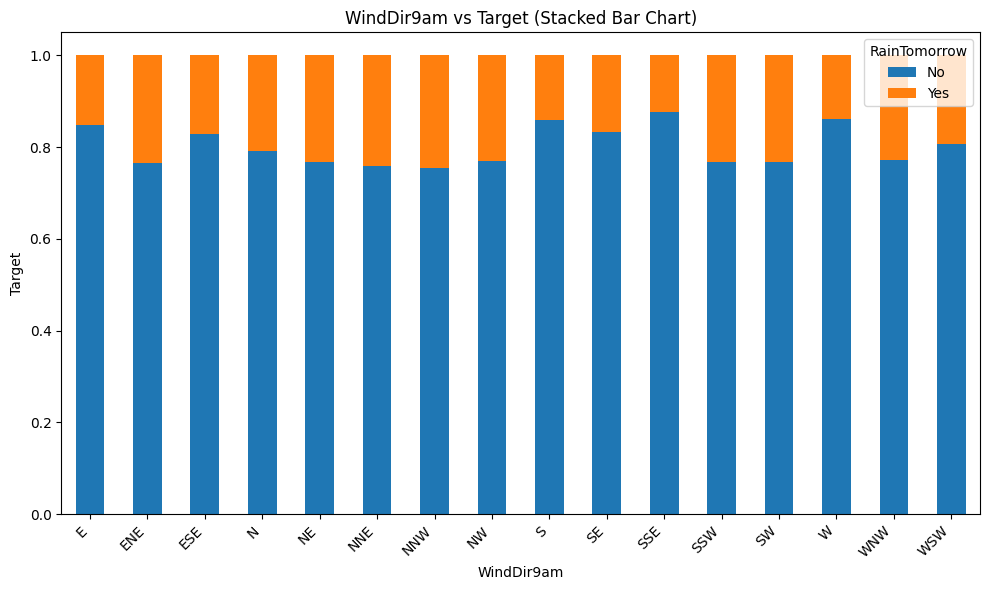

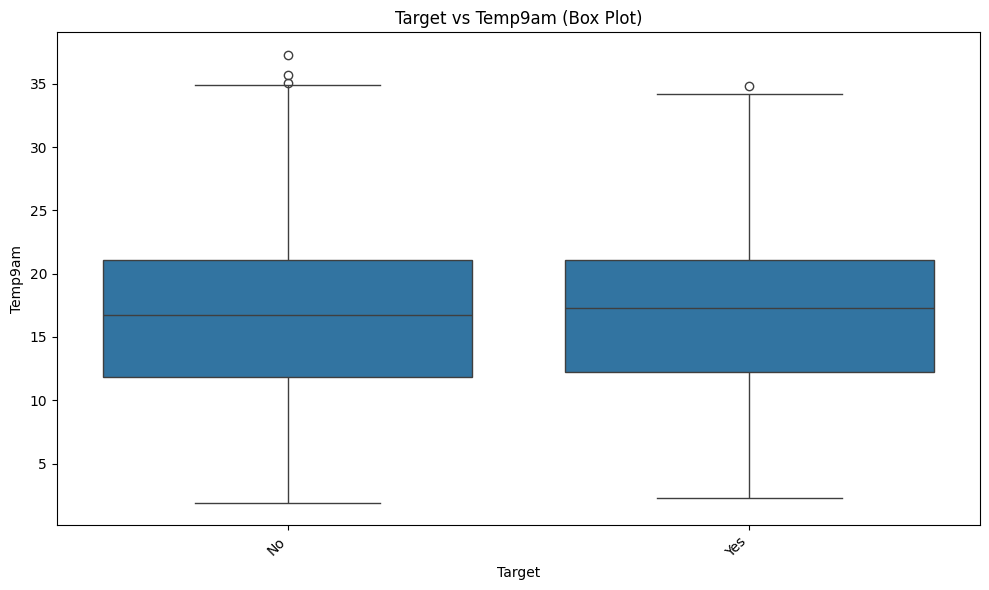

In [8]:
selected_by_2 = fs.selected_by_at_least(2)
print("\nFeatures selected by at least 2 methods:", selected_by_2)

fs.feature_plot(selected_by_2)

In [9]:
od = OutlierDetector(X_train, y_train)
outliers = od.run_selection()


In [ ]:
nb_pipeline = NaiveBayesPipeline(X_train, y_train, task_type='classification')
nb_pipeline
nb_pipeline.fit()

y_pred = nb_pipeline.predict(X_test)

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pipelines import NaiveBayesPipeline
import miceforest as mf
from feature_selection import FeatureSelector
import feature_selection
from outlier_detection import OutlierDetector
import outlier_detection


df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

nb_pipeline = NaiveBayesPipeline(X_train, y_train, task_type='classification')
nb_pipeline

In [2]:
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8016


In [14]:
df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pipelinesV2 import NBPipeline
import miceforest as mf
from feature_selection import FeatureSelector
import feature_selection
from outlier_detection import OutlierDetector
import outlier_detection


df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

nb_pipeline = NBPipeline(task_type='classification')
nb_pipeline

NBPipeline(steps=[('remove_missing_y', RemoveMissingYValues()),
                  ('converter', ColumnTypeConverter()),
                  ('mice_imputer', MICEImputer()),
                  ('preprocessor',
                   ColumnTransformer(transformers=[('num',
                                                    Pipeline(steps=[('scaler',
                                                                     StandardScaler())]),
                                                    <function NBPipeline.__init__.<locals>.<lambda> at 0x0000017504C719E0>),
                                                   ('cat',
                                                    Pipeline(steps=[('ordinal',
                                                                     OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                    unknown_value=-1))]),
                                                    <function NBPipeline.__init__.<locals>.<lambda> at 0x0000017515483F60>)])),
                  ('classifier', GaussianNB())])

In [2]:
nb_pipeline.fit(X_train, y_train)
y_pred = nb_pipeline.predict(X_test)


Removing rows with missing y values: 108
Unique labels after encoding: [0 1]
Removing rows with missing y values: 0


In [3]:
print(y_pred)

['No' 'No' 'No' ... 'No' 'No' 'No']


In [4]:
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8011


In [17]:
nb_pipeline.steps[-1]

('classifier', GaussianNB())

In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'imputer__datasets': [3, 4],
    'imputer__iterations': [3],
    'classifier__gnb__var_smoothing': [1e-9],
}

grid_search = GridSearchCV(nb_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best Score: ", grid_search.best_score_)
print("Best Params: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

TypeError: '<' not supported between instances of 'float' and 'str'

In [4]:
from pipelinesV2 import GLMPipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import miceforest as mf
from feature_selection import FeatureSelector
import feature_selection
from outlier_detection import OutlierDetector
import outlier_detection

df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

glm_pipeline = GLMPipeline(task_type='classification')
glm_pipeline



GLMPipeline(steps=[('remove_missing_y', RemoveMissingYValues()),
                   ('converter', ColumnTypeConverter()),
                   ('mice_imputer', MICEImputer()),
                   ('preprocessor',
                    ColumnTransformer(transformers=[('num',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler())]),
                                                     <function GLMPipeline.__init__.<locals>.<lambda> at 0x0000028091FBE660>),
                                                    ('cat',
                                                     Pipeline(steps=[('onehot',
                                                                      OneHotEncoder(handle_unknown='ignore'))]),
                                                     <function GLMPipeline.__init__.<locals>.<lambda> at 0x00000280C68D7740>)])),
                   ('save_preprocessed_x', SavePreprocessedX()),
                   ('save_encoded_y', SaveEncodedY()),
                   ('classifier', LogisticRegression())])

In [3]:
from pipelinesV2 import GLMPipeline, NBPipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import miceforest as mf
from feature_selection import FeatureSelector
import feature_selection
from outlier_detection import OutlierDetector
import outlier_detection

df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("NA values in y_train:", y_train.isna().sum())

# Create and fit the pipeline (you can choose either NBPipeline or GLMPipeline)
pipeline = NBPipeline(task_type='classification')  # or GLMPipeline()
pipeline.fit(X_train, y_train)

# Check encoded y_train
# Check for missing values in encoded y_train
encoded_y_train = pipeline.named_steps['save_encoded_y'].encoded_y
missing_values = np.isnan(encoded_y_train).sum()
print("Number of missing values in encoded y_train:", missing_values)

# Check unique values in encoded y_train
unique_values = np.unique(encoded_y_train)
print("Unique values in encoded y_train:", unique_values)

# Check if encoding is correct (assuming binary classification)
if len(unique_values) == 2 and set(unique_values) == {0, 1}:
    print("y_train seems to be correctly encoded for binary classification")
else:
    print("Warning: y_train encoding might not be correct for binary classification")

# Print a sample of encoded y_train
print("Sample of encoded y_train:")
print(encoded_y_train[:10])

# If you want to see the original labels, you can inverse transform
if pipeline.task_type == 'classification' and pipeline.label_encoder is not None:
    original_labels = pipeline.label_encoder.inverse_transform(encoded_y_train)
    print("\nSample of original labels:")
    print(original_labels[:10])

# Check preprocessed X_train
preprocessed_X_train = pipeline.get_preprocessed_data(X_train)
print("Shape of preprocessed X_train:", preprocessed_X_train.shape)
print("Sample of preprocessed X_train:")
print(preprocessed_X_train[:5])

# Check preprocessed X_test
preprocessed_X_test = pipeline.get_preprocessed_data(X_test)
print("Shape of preprocessed X_test:", preprocessed_X_test.shape)
print("Sample of preprocessed X_test:")
print(preprocessed_X_test[:5])

# If you want to make predictions
y_pred = pipeline.predict(X_test)
print("Shape of predictions:", y_pred.shape)
print("Sample of predictions:")
print(y_pred[:5])

NA values in y_train: 108
Number of missing values in encoded y_train: 0
Unique values in encoded y_train: [0 1]
y_train seems to be correctly encoded for binary classification
Sample of encoded y_train:
[0 1 0 0 0 1 0 0 0 1]

Sample of original labels:
['No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes']
Shape of preprocessed X_train: (8021, 15)
Sample of preprocessed X_train:
[[-2.57965497e-01 -9.32284028e-01  1.54075330e+00  7.72998269e-03
   1.25571375e+00  2.45974861e-01  4.17662263e-01  1.11734073e+00
  -6.55806276e-01 -9.92894848e-01  0.00000000e+00  1.00000000e+01
   1.30000000e+01  2.00000000e+00  1.00000000e+00]
 [ 5.05891673e-01  6.77060100e-01 -2.41672005e-01  8.80415953e-01
  -1.46649298e+00 -1.09813057e+00  8.17862569e-02  6.21074584e-02
   4.05372763e-02  7.54477227e-01  1.00000000e+00  1.40000000e+01
   3.00000000e+00  5.00000000e+00  0.00000000e+00]
 [ 1.04695717e+00  7.75020178e-01 -2.41672005e-01 -7.06285811e-01
  -9.22051637e-01 -1.09813057e+00 -6.92188888e-01 -1.

In [1]:
from pipelinesV2 import GLMPipeline, NBPipeline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import miceforest as mf
from feature_selection import FeatureSelector
import feature_selection
from outlier_detection import OutlierDetector
import outlier_detection

df = pd.read_csv('weatherAUStest.csv')
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("NA values in y_train:", y_train.isna().sum())

# Create and fit the pipeline (you can choose either NBPipeline or GLMPipeline)
pipeline = NBPipeline(task_type='classification')  # or GLMPipeline()
pipeline.fit(X_train, y_train)

# Get the preprocessed X_train
preprocessed_X_train = pipeline.named_steps['save_preprocessed_x'].preprocessed_X

# Get the encoded y_train
encoded_y_train = pipeline.named_steps['save_encoded_y'].encoded_y

# Now preprocessed_X_train and encoded_y_train should have the same number of rows
print("Shape of preprocessed_X_train:", preprocessed_X_train.shape)
print("Shape of encoded_y_train:", encoded_y_train.shape)


NA values in y_train: 108
Shape of preprocessed_X_train: (7913, 15)
Shape of encoded_y_train: (7913,)


In [2]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'mice_imputer__datasets': [3, 4],
}

grid_search = GridSearchCV(pipeline, param_grid)
grid_search.fit(preprocessed_X_train, encoded_y_train)

print("Best Score: ", grid_search.best_score_)
print("Best Params: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ngyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ngyan\Documents\DAtoolkit\pipelinesV2.py", line 153, in fit
    return super().fit(X, y)
           ^^^^^^^^^^^^^^^^^
  File "C:\Users\ngyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ngyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ngyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ngyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ngyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ngyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ngyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py", line 1101, in fit_transform
    return self.fit(X, y, **fit_params).transform(X)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ngyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_set_output.py", line 295, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\ngyan\Documents\DAtoolkit\pipelinesV2.py", line 58, in transform
    return self.kernel.impute_new_data(new_data=X).complete_data(dataset=0)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ngyan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\miceforest\ImputationKernel.py", line 1578, in impute_new_data
    name=f"ind {str(iter_pairs[0][1])}-{str(iter_pairs[-1][1])}",
                    ~~~~~~~~~~^^^
IndexError: list index out of range


In [5]:
glm_pipeline[-1]

LogisticRegression()

In [6]:
glm_pipeline[0:3]

GLMPipeline(steps=[('remove_missing_y', RemoveMissingYValues()),
                   ('converter', ColumnTypeConverter()),
                   ('mice_imputer', MICEImputer()),
                   ('preprocessor',
                    ColumnTransformer(transformers=[('num',
                                                     Pipeline(steps=[('scaler',
                                                                      StandardScaler())]),
                                                     <function GLMPipeline.__init__.<locals>.<lambda> at 0x0000028091F832E0>),
                                                    ('cat',
                                                     Pipeline(steps=[('onehot',
                                                                      OneHotEncoder(handle_unknown='ignore'))]),
                                                     <function GLMPipeline.__init__.<locals>.<lambda> at 0x00000280CB2100E0>)])),
                   ('save_preprocessed_x', SavePreprocessedX()),
                   ('save_encoded_y', SaveEncodedY()),
                   ('classifier', LogisticRegression())],
            task_type=[('remove_missing_y', RemoveMissingYValues()),
                       ('converter', ColumnTypeConverter()),
                       ('mice_imputer', MICEImputer())])

In [7]:
X_train_processed = glm_pipeline[0].fit_transform(X_train)

In [22]:
len(glm_pipeline)

5

In [23]:
glm_pipeline.fit(X_train, y_train)
y_pred = glm_pipeline.predict(X_test)


In [24]:
accuracy = np.mean(y_pred == y_test)
print(f'Test Accuracy: {accuracy:.4f}')

Test Accuracy: 0.8574


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'mice_imputer__datasets': [3, 4],
    'classifier__C': [0.5, 1.0]
}

grid_search = GridSearchCV(glm_pipeline, param_grid)
grid_search.fit(X_train, y_train)

print("Best Score: ", grid_search.best_score_)
print("Best Params: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

TypeError: '<' not supported between instances of 'float' and 'str'